In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale
from sklearn.decomposition import PCA
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from custom_functions import vector_to_image, stack_to_matrix, plot_pca_weights, percentile_nan, despline
plt.rcParams["pdf.fonttype"] = 42

In [2]:
# Load data
l_new = list(np.load(open("mz_values.npy", "rb")))
single_cell_0711 = np.load(open("dHF_image.npy", "rb"))
mask = np.load(open("dHF_mask.npy", "rb"))

In [3]:
# Make into matrix
ix_foreg = np.where(mask.flat[:])[0]
foreg_single_cell = stack_to_matrix(single_cell_0711, ix_foreg)

In [4]:
# Normalize
sc_pixels = np.log1p(foreg_single_cell)
sc_pixels_norm = sc_pixels / sc_pixels.std(1)[:, None]

In [5]:
# Run PCA
pca = PCA()
X = foreg_single_cell.copy()
X = (X / X.sum(1)[:, None]) * X.sum(1).mean()
pcs = pca.fit_transform(np.log(X+1))

/home/lamanno/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


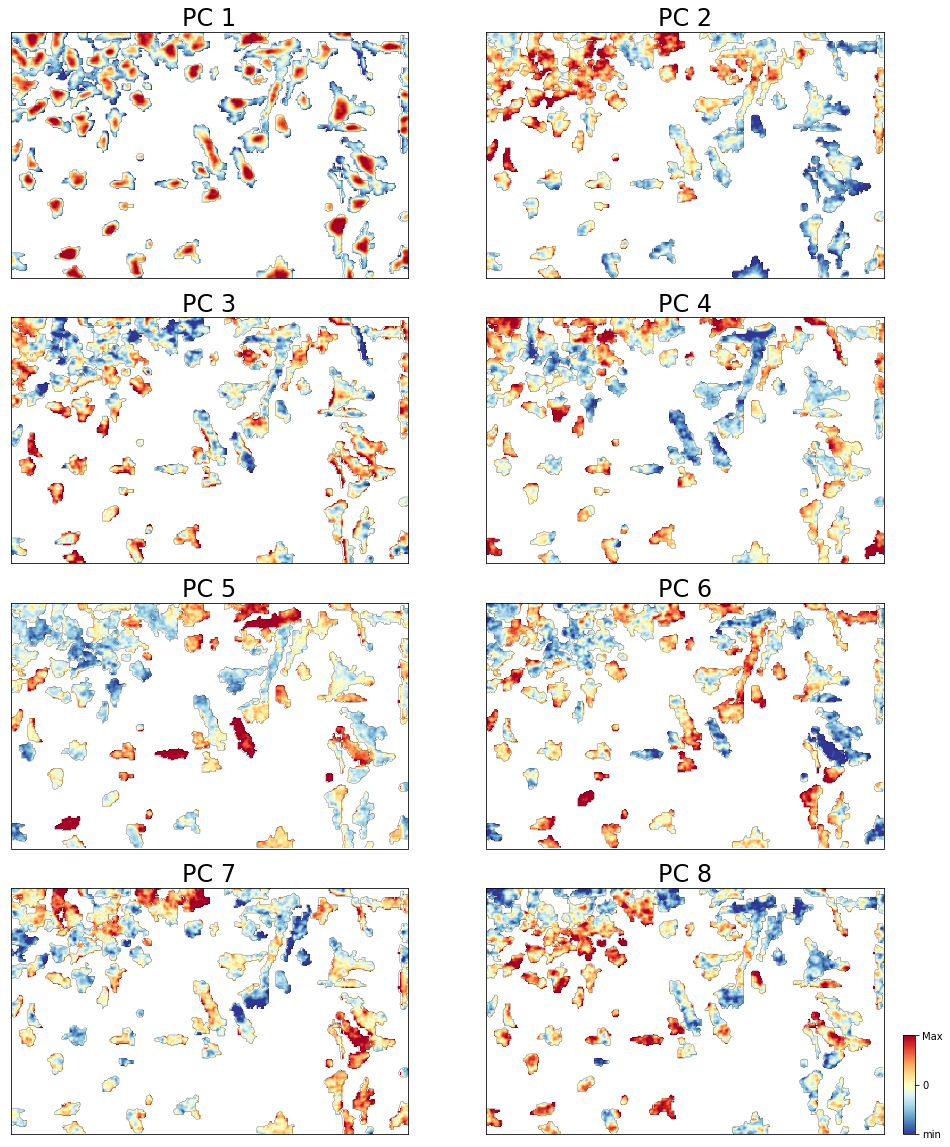

In [6]:
# Make coordinate plot

plt.figure(None,(14,16))

ccmap = plt.cm.get_cmap("RdYlBu_r")
ccmap.set_bad(color='w')
mask_ = np.isnan(vector_to_image(pcs[:, 0], ix_foreg, (234, 378), fill_value=np.nan)).astype(float)
gs = plt.GridSpec(4,2)

for i in range(8):
    ax = plt.subplot(gs[i])
    pcs_i = vector_to_image(pcs[:, i], ix_foreg, (234, 378), fill_value=np.nan)
    lim = percentile_nan(pcs_i, 95)
    plt.imshow(pcs_i, cmap = ccmap, vmax=lim, vmin=-lim)
    if i == 7:
        axins = inset_axes(ax, width="3%", height="40%", loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),bbox_transform=ax.transAxes,borderpad=0)
        cb = plt.colorbar(ax=ax, cax=axins)
        cb.set_ticks([-lim,0, lim])
        cb.ax.set_yticklabels(["min", '0', 'Max'])
    ax.contour(mask_, levels=[0.5], linewidths=[0.25], colors=["k"])
    ax.set_title(f"PC {i+1}", fontsize=24)
    ax.grid('off')
    #plt.axis('off')
    ax.set_yticks([])
    ax.set_xticks([])
plt.tight_layout()
#plt.savefig(f"single_pixels_pcs_coordinates.pdf", dpi=200)

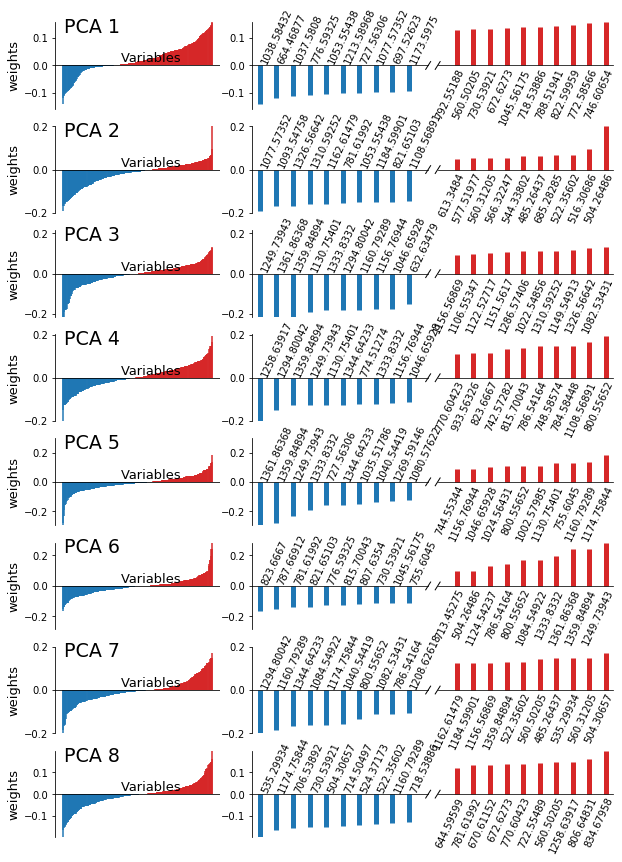

In [7]:
# Make loadings plot
plt.figure(None, (10,15))
plot_pca_weights(pca.components_, l_new, np.arange(8), 10)
#plt.savefig(f"single_pixels_loadings.pdf", dpi=200)